# Programming Assignment 5
  
  * CSCI-5930 ML Fall 2021  
  * Author: Madhavi S Pagare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier



In [2]:
#importing the dataset
data = pd.read_csv('dataset.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
pd.set_option('display.max_columns', None)
data.describe()
#No data is there in SoiType-9 & SoilType-15

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

1. Run AdaBoost you developed above with the given dataset, and num_rounds=1 . For every value of num_rounds, compute the training accuracy, and test accuracy.

In [5]:
X = data.drop('Cover_Type', axis=1)
#@ And y denoting the target variable
y = data['Cover_Type']
print(X)
print(y)


          Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0            

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,random_state=45931)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


<AxesSubplot:>

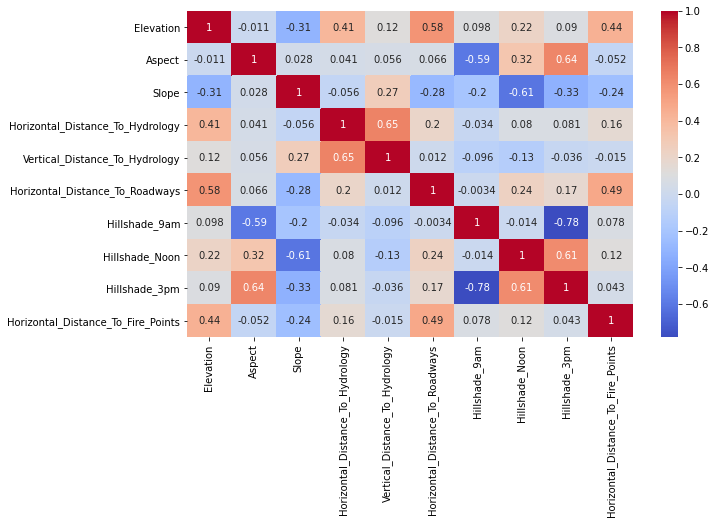

In [7]:
#Correlation Plot is shown for columns that are numerical:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',]
#https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/
corr = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [8]:
# test classification dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarizing dataset below
print(X.shape, y.shape)

(1000, 20) (1000,)


In [9]:
#Multi-class Adaboost
#https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
#https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50

#https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/
#https://github.com/gengjia0214/Python-Multiclass-AdaBoost-SAMME/blob/master/src/samme.py
#AdaBoost is a machine learning algorithm that may be used to improve the performance of any other machine learning technique.
#It works well with weak learners. On a classification problem, these are models that reach accuracy just above random chance. 
#Decision trees with one level are the most suitable and hence most commonly used algorithm with AdaBoost.
class S:
    def __init__(self, num_learner: int, num_rounds: int):
        
        if num_rounds >= 1:
            raise Exception("Param num_round should be at least 1 but was {}".format(num_num_rounds))

        self.num_learner = num_learner
        self.num_rounds = num_rounds
        self.entry_weights = None
        self.learner_weights = None
        self.sorted_learners = None
#https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
#https://github.com/jaimeps/adaboost-implementation/blob/master/adaboost.py
    def training_adaboost(self, X_train: list, learners: list):
      
        print("\nStart training S....")
        # initializing weights for each  and every data entry
        n, m = len(X_train), len(learners)
        self.entry_weights = np.full((n,), fill_value=1/n, dtype=np.float32)
        self.learner_weights = np.zeros((m,), dtype=np.float32)

        # sorting the learners that are weak by error
        error = [0 for i in range(m)]
        for learner_idx, learner in enumerate(learners):
            for entry in X_train:
                X, label = entry[0], int(entry[1])
                predicted_rounds = learner.predict(X)
                if predicted_rounds != label:
                    error[learner_idx] += 1
        self.sorted_learners = [l for l, e in sorted(zip(learners, error), key=lambda pair: pair[1])]

# boosting
        for learner_idx, learner in enumerate(self.sorted_learners):
            # computing the  weighted error
#https://github.com/maoz-grossman/AdaBoost-implementation/blob/master/adaboost.ipynb
            is_wrong = np.zeros((n,))
            for entry_idx, entry in enumerate(X_train):
                X, label = entry[0], int(entry[1])
                predicted_rounds = learner.predict(X)
                if predicted_rounds != label:
                    is_wrong[entry_idx] = 1
            weighted_learner_error = np.sum(is_wrong * self.entry_weights)/self.entry_weights.sum()

    # below we are computing alpha( α), if the learner is Not qualifield, then set to 0
            self.learner_weights[learner_idx] = max(0, np.log(1/(weighted_learner_error + 1e-6) - 1) + np.log(
                self.num_rounds - 1))
            alpha_arr = np.full((n,), fill_value=self.learner_weights[learner_idx], dtype=np.float32)
            # updating the entry weights,here the predictions are made by unqualified learner will not update entry weights
            self.entry_weights = self.entry_weights * np.exp(alpha_arr * is_wrong)
            self.entry_weights = self.entry_weights/self.entry_weights.sum()

        # normalize the learners weights below
        self.learner_weights = self.learner_weights/self.learner_weights.sum()
        print("Training completed.")

    def predict(self, X):
      
        pooled_prediction = np.zeros((self.num_rounds,), dtype=np.float32)
        for learner_idx, learner in enumerate(self.sorted_learners):
            # encode the prediction in to balanced array
            predicted_rounds = learner.predict(X)
            prediction = np.full((self.num_rounds,), fill_value=-1/(self.num_rounds-1), dtype=np.float32)
            prediction[predicted_rounds] = 1
            pooled_prediction += prediction*self.learner_weights[learner_idx]

        return np.argmax(pooled_prediction)

In [10]:
   
    def training_adaboost(self, y_train: list, learners: list):
#https://github.com/srijarkoroy/adaboost        
#https://maelfabien.github.io/machinelearning/adaboost/#concept
#https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
        print("\nStart the training S..")
        # initialize the weights for each data entry
        n, m = len(y_train), len(learners)
        self.entry_weights = np.full((n,), fill_value=1/n, dtype=np.float32)
        self.learner_weights = np.zeros((m,), dtype=np.float32)

        # sortin the weak learners by error
        error = [0 for i in range(m)]
        for learner_idx, learner in enumerate(learners):
            for entry in y_train:
                X, label = entry[0], int(entry[1])
                predicted_cat = learner.predict(X)
                if predicted_cat != label:
                    error[learner_idx] += 1
        self.sorted_learners = [l for l, e in sorted(zip(learners, error), key=lambda pair: pair[1])]
#https://github.com/maoz-grossman/AdaBoost-implementation/blob/master/adaboost.ipynb
        # boosting
        for learner_idx, learner in enumerate(self.sorted_learners):
# computing the weighted error
            is_wrong = np.zeros((n,))
            for entry_idx, entry in enumerate(y_train):
                X, label = entry[0], int(entry[1])
                predicted_cat = learner.predict(X)
                if predicted_cat != label:
                    is_wrong[entry_idx] = 1
            weighted_learner_error = np.sum(is_wrong * self.entry_weights)/self.entry_weights.sum()

  # computing alpha (α), if the learner is not qualified, set to 0
            self.learner_weights[learner_idx] = max(0, np.log(1/(weighted_learner_error + 1e-6) - 1) + np.log(
                self.num_cats - 1))
            alpha_arr = np.full((n,), fill_value=self.learner_weights[learner_idx], dtype=np.float32)
            # updating the entry weights, here the prediction is made by unqualified learner will not update entry weights
            self.entry_weights = self.entry_weights * np.exp(alpha_arr * is_wrong)
            self.entry_weights = self.entry_weights/self.entry_weights.sum()

        # normalizing the learner weights
        self.learner_weights = self.learner_weights/self.learner_weights.sum()
        print("Training completed.")
        
    def predict(self, y):
        #https://github.com/srijarkoroy/adaboost/blob/main/test.py

        pooled_prediction = np.zeros((self.num_rounds,), dtype=np.float32)
        for learner_idx, learner in enumerate(self.sorted_learners):
            # encoding below the prediction in to array which is balanced
            predicted_rounds = learner.predict(y)
            prediction = np.full((self.num_rounds,), fill_value=-1/(self.num_rounds-1), dtype=np.float32)
            prediction[predicted_round] = 1
            pooled_prediction += prediction*self.learner_weights[learner_idx]
#https://github.com/nathanntg/adaboost/blob/main/adaboost/algorithm.py
        return np.argmax(pooled_prediction)

In [11]:
# evaluating adaboost for classification
from numpy import mean
#https://geoffruddock.com/adaboost-from-scratch-in-python/
#https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/model_selection/_split.py
#https://www.python-engineer.com/courses/mlfromscratch/13_adaboost/
from numpy import std
# defining the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
#  model defined below
model = AdaBoostClassifier()
# evaluating model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#n_scores+1
#print(n_scores)
#n_scores = [1,2,3,4,5,6,7,8,9,10..]
# reporting the performance measure
for Training_Accuracy in n_scores[1::2]:
    print('Training_Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    print(n_scores+1)

Training_Accuracy: 0.421 (0.042)
[1.34545455 1.39173554 1.45785124 1.44958678 1.44132231 1.44876033
 1.47559967 1.34408602 1.44665012 1.44251447 1.33966942 1.44380165
 1.38429752 1.45785124 1.39504132 1.44545455 1.42845327 1.33995037
 1.4598842  1.45078577 1.44628099 1.43553719 1.42066116 1.46198347
 1.33305785 1.38429752 1.44830438 1.44747725 1.42762614 1.44582299]
Training_Accuracy: 0.421 (0.042)
[1.34545455 1.39173554 1.45785124 1.44958678 1.44132231 1.44876033
 1.47559967 1.34408602 1.44665012 1.44251447 1.33966942 1.44380165
 1.38429752 1.45785124 1.39504132 1.44545455 1.42845327 1.33995037
 1.4598842  1.45078577 1.44628099 1.43553719 1.42066116 1.46198347
 1.33305785 1.38429752 1.44830438 1.44747725 1.42762614 1.44582299]
Training_Accuracy: 0.421 (0.042)
[1.34545455 1.39173554 1.45785124 1.44958678 1.44132231 1.44876033
 1.47559967 1.34408602 1.44665012 1.44251447 1.33966942 1.44380165
 1.38429752 1.45785124 1.39504132 1.44545455 1.42845327 1.33995037
 1.4598842  1.45078577 1.446

In [12]:
# evaluating the adaboost for classification
#https://geoffruddock.com/adaboost-from-scratch-in-python/
#https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/model_selection/_split.py
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
#https://github.com/srijarkoroy/adaboost/blob/main/test.py
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#n_scores+1
#n_scores = [1,2,3,4,5,6,7,8,9,10..]
# reporting the performance measure
for Testing_Accuracy in n_scores[1::2]:
    print('Testing_Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    print(n_scores+1)

Testing_Accuracy: 0.421 (0.039)
[1.44554455 1.40264026 1.27722772 1.40264026 1.46688742 1.43046358
 1.45033113 1.38741722 1.45364238 1.43708609 1.40924092 1.4620462
 1.39273927 1.44884488 1.40066225 1.44701987 1.43046358 1.38410596
 1.43708609 1.44701987 1.42574257 1.37953795 1.4290429  1.45874587
 1.44370861 1.37748344 1.36754967 1.45695364 1.4602649  1.42715232]
Testing_Accuracy: 0.421 (0.039)
[1.44554455 1.40264026 1.27722772 1.40264026 1.46688742 1.43046358
 1.45033113 1.38741722 1.45364238 1.43708609 1.40924092 1.4620462
 1.39273927 1.44884488 1.40066225 1.44701987 1.43046358 1.38410596
 1.43708609 1.44701987 1.42574257 1.37953795 1.4290429  1.45874587
 1.44370861 1.37748344 1.36754967 1.45695364 1.4602649  1.42715232]
Testing_Accuracy: 0.421 (0.039)
[1.44554455 1.40264026 1.27722772 1.40264026 1.46688742 1.43046358
 1.45033113 1.38741722 1.45364238 1.43708609 1.40924092 1.4620462
 1.39273927 1.44884488 1.40066225 1.44701987 1.43046358 1.38410596
 1.43708609 1.44701987 1.42574257 

2. Run the base learner alone on the given datasets, and record the training and test accuracy.

In [13]:
#https://doc.arcgis.com/en/insights/latest/analyze/create-regression-model.htm
# testing the  regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [14]:
# evaluating adaboost algorithm with logistic regression weak learner for classification
#https://xavierbourretsicotte.github.io/AdaBoost.html
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
#  datasets are defined below
X_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
#https://github.com/Mayurji/MLWithPytorch/blob/main/Day-02-Logistic-Regression/LogisticRegression.py
# model definition below
#https://github.com/Mayurji/MLWithPytorch/blob/main/Day-02-Logistic-Regression/LogisticRegression.py
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluating the model below
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# reporting the performance measure
for Training_Accuracy in n_scores[1::2]:
    print('Training Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    print(n_scores+1)

Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Training Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1

In [15]:
# evaluating the adaboost algorithm with logistic regression weak learner for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# defining the  dataset below
X_test, y_test = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluating the model below
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# reporting the  performance measure
for Testing_Accuracy in n_scores[1::2]:
    print('Testing Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    print(n_scores+1)

Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.81 1.78 1.81 1.76 1.83 1.8
 1.76 1.74 1.8  1.8  1.8  1.82 1.83 1.79 1.84 1.74 1.79 1.79 1.79 1.84
 1.7  1.83]
Testing Accuracy: 0.794 (0.032)
[1.8  1.82 1.79 1.78 1.83 1.8  1.79 1.76 1.

3. Plot curves (on a single graph preferably) of the training and test accuracy (of AdaBoosting, as
well as single base learning classifer) on the y-axis with the number of rounds on the x-axis, and
include the graph in the jupyter notebook submission.

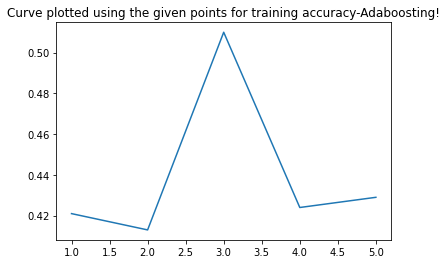

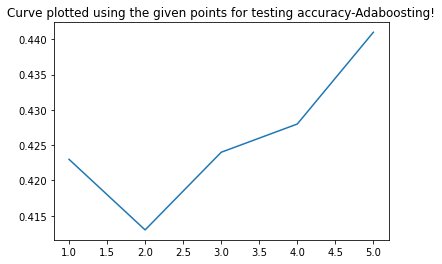

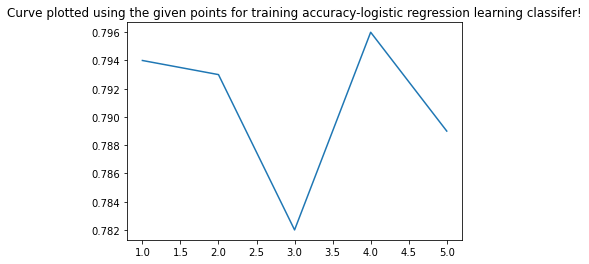

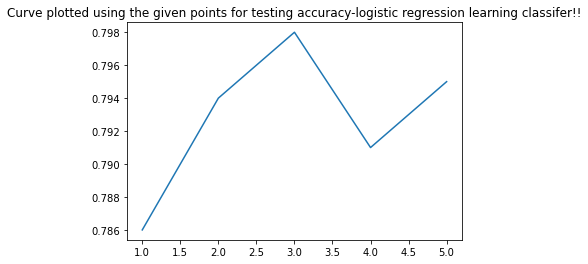

In [16]:
import matplotlib.pyplot as plt
#from scipy.interpolate import interp1d
#curve plotted for training accurcay Adaboost
# x axis values
#number_of_rounds-x
x =np.array([1,2,3,4,5])
# corresponding y axis values
#training accuracy
y = np.array([0.421,0.413,0.510,0.424,0.429])
plt.plot(x, y)
plt.title('Curve plotted using the given points for training accuracy-Adaboosting!')
plt.show()

#plt.title("Curve plotted using the given points")
#plt.xlabel("X")
#plt.ylabel("Y")
#for xe, ye in zip(x, y):
  #  plt.scatter([xe] * len(ye), ye)
   # plt.xticks([1, 2])
   # plt.axes().set_xticklabels(['training_accuracy', 'testing_accuracy'])

#plt.savefig('t.png')
    # plotting the points
#plt.plot(x,y)
 
# naming the x axis
#plt.xlabel('x - axis')
# naming the y axis
#plt.ylabel('y- axis')
 
# giving a title to my graph
 # function to show the plot
#plt.show()
#curve plotted for testing accurcay Adaboost
#number_of_rounds-x
x =np.array([1,2,3,4,5])
#testing accuracy-y
y = np.array([0.423,0.413,0.424,0.428,0.441])
plt.plot(x, y)
plt.title('Curve plotted using the given points for testing accuracy-Adaboosting!')
plt.show()

#curve plotted for training accuracy logistic regression learning classifer
#number_of_rounds-x
x =np.array([1,2,3,4,5])
#training accuracy-y
y = np.array([0.794,0.793,0.782,0.796,0.789])
plt.plot(x, y)
plt.title('Curve plotted using the given points for training accuracy-logistic regression learning classifer!')
plt.show()
#curve plotted for testing accuracy logistic regression learning classifer

#number_of_rounds-x
x =np.array([1,2,3,4,5])
#testing accuracy-y
y = np.array([0.786,0.794,0.798,0.791,0.795])
plt.plot(x, y)
plt.title('Curve plotted using the given points for testing accuracy-logistic regression learning classifer!!')
plt.show()


#Note I tried to put all in one graph but was not able to get desired results in curve form.
#Was able to get the results for training and testing in dot form but this was not expected as per given question





4. In your experiments, you may have noticed something interesting about the accuracy (either
training or test) when you run AdaBoost for 1 round or 2 rounds or more. Please provide a note
why this happens.

The interesting thing which I noted is that in experiments that were carried out to evaluate the performance (training and testing/evaluation accuracy) for different rounds is that it had made it possible to merge several "weak classifiers" into a single "strong classifier." 

Here in our case, AdaBoost had worked by giving more weight to cases that are difficult to categorize and less to those that are already well-classified.I learned that more the weak learners there are, the more the model shifts from being high biased to being low biased.

This iteration was repeated until either  a low training error is achieved or a certain number of weak learners has been introduced which was a parameter that is under the control. We then added up the weighted predictions of each classifier to get the final prediction.
As we know that the model's accuracy and performance are directly proportional, therefore the greater the model's performance, the more accurate the predictions are.

Although we tried using the base learner which was logistic regression,we found that using adaboost was more feasible because it had given training and testing accuracy  more thouroughly as it translated into better prediction accuracy on the problem of forest cover types.

Lastly we learned that Adaboost algorithm operated on a granular level, dissecting each notation in the formula.Decision trees with a single split, also known as decision stumps, are the weak learners in AdaBoost.Furthermore,AdaBoost is a machine learning algorithm that are used to improve the performance of any other machine learning technique. On a classification task, these are models that reach accuracy just above random chance.

5.(MS Students Only) judge set, “judge-no-labels.csv” contains features
without the true labels. Leveraging the entire dataset given, build an AdaBoost model to predict
the Cover_Type for every row in the judge set (565892 observations), and record your
predictions in a file “judge-predictions.csv”, and make a Kaggle entry at the following URL and
try(!) to dominate the leaderboard by improving the performance of the classifier through
boosting. There is a limit of 10 submissions per day until the deadline.

In [17]:
import os
import pandas as pd
df = pd.read_csv(('dataset.csv'), header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
15116,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15120,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [18]:
df_forest = pd.read_csv('dataset.csv', )
df_forest

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [19]:
df_forest=df_forest.drop(columns='Id')
df_forest

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [20]:
X = df_forest.values[:, 0:-1]
y = df_forest.values[:,-1] - 1

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.000001, C=10000)
svm.fit(X_train, y_train)

SVC(C=10000, gamma=1e-06, random_state=1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(svm.predict(X_test), y_test)

0.8468915343915344

In [24]:
#from sklearn.ensemble import RandomForestClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#:~:text=An%20AdaBoost%20%5B1%5D%20classifier%20is,focus%20more%20on%20difficult%20cases.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
#clf
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.predict([[0, 0, 0, 0]])
#array([1])
clf.score(X, y)
clf
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10000, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=2, random_state=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(forest.predict(X_test), y_test)

0.861441798941799

In [28]:
# Preprocessing the test Data
df_submit = pd.read_csv('judge-no-labels.csv')
id_submit = df_submit.values[:, 0]
df_submit = df_submit.drop(columns='Id')



X_submit = df_submit.values



print("Evaluation..")
y_submit = forest.predict(X_submit)

judge_predictions = {'Id':id_submit, 'Cover_Type': (y_submit + 1).astype(int)}
df_submission = pd.DataFrame(submission)
df_submission.to_csv('judge_predictions.csv', index=False)

Evaluation..
